# ML Project for MoML in Montreal 

### Multilayer Perceptron (MLP) Classifier applied to a set of compound with biological activity against
### tyrosine kinases.

In [1]:
pip install rdkit

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Loads the bioactivity data into a Pandas dataframe
bioactivity_data = pd.read_csv("Kinase_final_data.csv")
print(bioactivity_data.iloc[:,0:7])

      molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL3648023  CCCCc1ccc(Nc2nnc3cc(-c4cc(OC)cc(OC)c4)cc(C)c3n...   
1           CHEMBL154969  CONC(=O)CCc1c(SSc2[nH]c3ccccc3c2CCC(=O)NOC)[nH...   
2           CHEMBL507058              COc1cc(O)c2c(c1)-c1cc(O)c(O)cc1COC2=O   
3          CHEMBL3401367        COc1cccc(-c2nc3c(O)nc(NC(C)=O)nc3[nH]2)c1OC   
4          CHEMBL3681299  Cc1nc2cc(-n3ncc(C(=O)c4cc5cc(C(C)(C)C)ccc5[nH]...   
...                  ...                                                ...   
21436      CHEMBL3360610  C#Cc1cccc(Nc2ncnc3cc(OCCCCCCn4ccnc4[N+](=O)[O-...   
21437      CHEMBL1269735                          OCCNc1ncnc2sc3c(c12)CCCC3   
21438      CHEMBL1276317        O=C1Nc2ccccc2/C1=C1/Nc2ccccc2/C1=N\OCC(O)CO   
21439       CHEMBL604483  COc1cc2c(Oc3ccc(-c4nc5ccccc5s4)cc3F)ncnc2cc1OC...   
21440        CHEMBL25425     COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCCC1CCN(C)CC1   

       standard_value         class       MW     Lo

In [10]:
bioactivity_data.describe()

,standard_value,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,2.144100e+04,21441.000000,21441.000000,21441.000000,21441.000000,21441.000000
mean,1.569319e+05,457.727912,4.315861,2.103680,6.502355,6.445481
std,1.475192e+07,125.533487,1.553531,1.607012,2.215239,1.527983
min,5.010000e-09,90.034000,-11.854300,0.000000,0.000000,0.000000
25%,2.200000e+01,376.847000,3.403800,1.000000,5.000000,5.070581
50%,3.710000e+02,454.534000,4.326000,2.000000,6.000000,6.430626
75%,8.500000e+03,524.452000,5.252600,3.000000,8.000000,7.657577
max,2.120000e+09,2554.545000,13.028900,37.000000,36.000000,17.299989


In [ ]:
# Converts the SMILES strings to RDKit molecules
molecules = [Chem.MolFromSmiles(smiles) for smiles 
             in bioactivity_data['canonical_smiles']]

# Generates the Morgan fingerprints for each molecule
fingerprints = [Chem.RDKFingerprint(molecule) for molecule in molecules]

# Converts the bioactivity data to binary classification labels
labels = [1 if bioactivity >= 6 else 0 for bioactivity in bioactivity_data['pIC50']]

In [12]:
# Standardize the input features
scaler = StandardScaler()
fingerprints_scaled = scaler.fit_transform(fingerprints)

In [13]:
# Train the neural network model
model = MLPClassifier(hidden_layer_sizes=(100, 50, 25), activation='relu', alpha=0.001, solver='adam',
                      learning_rate='constant', max_iter=200, batch_size='auto', learning_rate_init=0.001,
                      shuffle=True, random_state=42, tol=1e-4, verbose=True, warm_start=False,
                      early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)

In [14]:
# Perform cross-validation and get the scores
cv_scores = cross_val_score(model, fingerprints_scaled, labels, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

Iteration 1, loss = 0.45514672
Validation score: 0.825175
Iteration 2, loss = 0.34076825
Validation score: 0.835664
Iteration 3, loss = 0.29290644
Validation score: 0.835664
Iteration 4, loss = 0.26384132
Validation score: 0.840909
Iteration 5, loss = 0.24162969
Validation score: 0.839161
Iteration 6, loss = 0.22596435
Validation score: 0.838578
Iteration 7, loss = 0.21194246
Validation score: 0.839161
Iteration 8, loss = 0.20033030
Validation score: 0.835082
Iteration 9, loss = 0.19290702
Validation score: 0.833916
Iteration 10, loss = 0.18666866
Validation score: 0.843240
Iteration 11, loss = 0.18353684
Validation score: 0.845571
Iteration 12, loss = 0.17333598
Validation score: 0.829837
Iteration 13, loss = 0.16828424
Validation score: 0.833333
Iteration 14, loss = 0.16196870
Validation score: 0.831585
Iteration 15, loss = 0.16275284
Validation score: 0.836830
Iteration 16, loss = 0.15278940
Validation score: 0.839744
Iteration 17, loss = 0.15510121
Validation score: 0.827506
Iterat

In [110]:
# Splits the data into training and testing sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(fingerprints, 
                                            labels, test_size=0.5, random_state=42)
# Train the model on the training set
model.fit(X_train, y_train)

Iteration 1, loss = 0.57637292
Validation score: 0.738806
Iteration 2, loss = 0.46961319
Validation score: 0.794776
Iteration 3, loss = 0.42634394
Validation score: 0.763993
Iteration 4, loss = 0.39604270
Validation score: 0.805970
Iteration 5, loss = 0.37431684
Validation score: 0.812500
Iteration 6, loss = 0.35454936
Validation score: 0.811567
Iteration 7, loss = 0.34273396
Validation score: 0.831157
Iteration 8, loss = 0.31716021
Validation score: 0.818097
Iteration 9, loss = 0.30673919
Validation score: 0.817164
Iteration 10, loss = 0.28561869
Validation score: 0.797575
Iteration 11, loss = 0.29532584
Validation score: 0.814366
Iteration 12, loss = 0.29055202
Validation score: 0.819030
Iteration 13, loss = 0.26277432
Validation score: 0.825560
Iteration 14, loss = 0.25365088
Validation score: 0.805970
Iteration 15, loss = 0.24605382
Validation score: 0.825560
Iteration 16, loss = 0.23379419
Validation score: 0.824627
Iteration 17, loss = 0.22938211
Validation score: 0.801306
Iterat

MLPClassifier(alpha=0.001, early_stopping=True,
              hidden_layer_sizes=(100, 50, 25), random_state=42, verbose=True)

In [111]:
# Makes predictions on the testing set
y_pred = model.predict(X_test)

# Prints the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      4173
           1       0.83      0.88      0.85      6548

    accuracy                           0.82     10721
   macro avg       0.81      0.80      0.80     10721
weighted avg       0.82      0.82      0.81     10721



In [112]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.8167148586885552
Precision: 0.8312852392655775
Recall: 0.8781307269395235
F1 Score: 0.8540660972892685


In [113]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

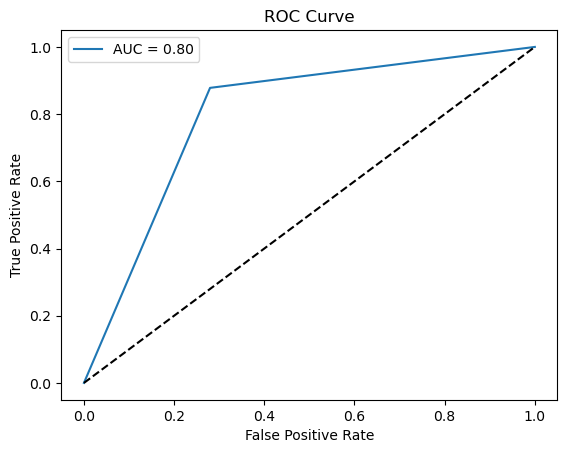

In [114]:
# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

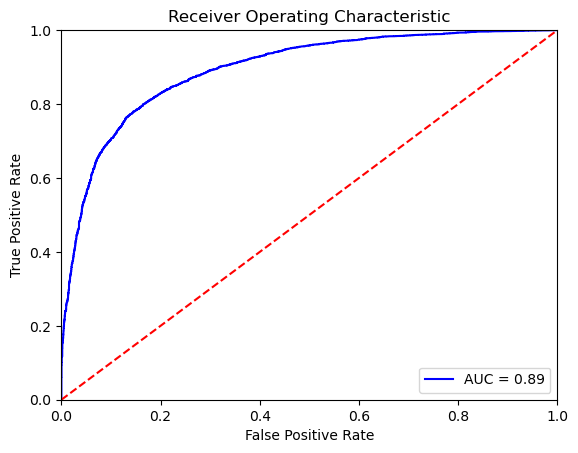

In [115]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plot the curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

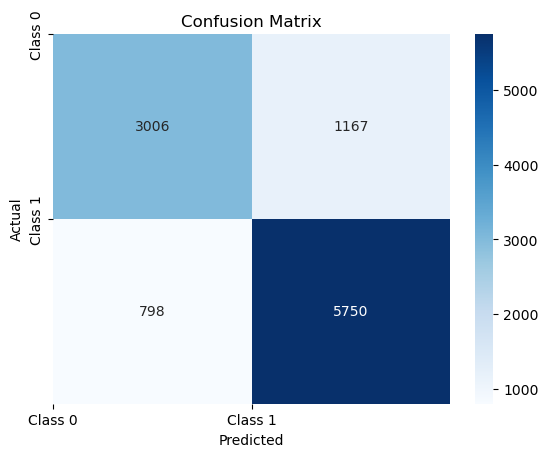

In [116]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a list of class labels
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)

# Show the plot
plt.show()

# ML Proyect for MoML in Montreal 
### Gaussian Naive-Bayer (G-NB) Classifier applied to a set of compound with biological activity against tyrosine kinases.

In [57]:
# Loads the bioactivity data into a Pandas dataframe
bioactivity_data = pd.read_csv("ligands_descriptors_updated.csv", sep=';')
print(bioactivity_data.iloc[:,0:11])

                                                  SMILES   MolWt  LogP  HBD  \
0      CCCCc1ccc(Nc2nnc3cc(-c4cc(OC)cc(OC)c4)cc(C)c3n...  428.54  6.10    1   
1      CONC(=O)CCc1c(SSc2[nH]c3ccccc3c2CCC(=O)NOC)[nH...  498.63  4.67    4   
2                  COc1cc(O)c2c(c1)-c1cc(O)c(O)cc1COC2=O  288.26  2.15    3   
3            COc1cccc(-c2nc3c(O)nc(NC(C)=O)nc3[nH]2)c1OC  329.32  1.70    3   
4      Cc1nc2cc(-n3ncc(C(=O)c4cc5cc(C(C)(C)C)ccc5[nH]...  412.50  4.65    3   
...                                                  ...     ...   ...  ...   
21436  C#Cc1cccc(Nc2ncnc3cc(OCCCCCCn4ccnc4[N+](=O)[O-...  486.53  5.11    1   
21437                          OCCNc1ncnc2sc3c(c12)CCCC3  249.34  1.97    2   
21438        O=C1Nc2ccccc2/C1=C1/Nc2ccccc2/C1=N\OCC(O)CO  351.36  1.55    4   
21439  COc1cc2c(Oc3ccc(-c4nc5ccccc5s4)cc3F)ncnc2cc1OC...  559.67  5.86    0   
21440     COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCCC1CCN(C)CC1  444.94  5.29    1   

       HBA  RotatableBonds    TPSA  Volume  Lipinsk

In [58]:
#bioactivity_data.drop('molecule_chembl_id', axis=1, inplace=True)
#bioactivity_data.drop('canonical_smiles', axis=1, inplace=True)
#bioactivity_data.drop('standard_value', axis=1, inplace=True)
bioactivity_data.drop('SMILES', axis=1, inplace=True)

bioactivity_data.to_csv("dataset-processed.csv", index=False)
# Let's see what's in the Bank-full data - Jupyter notebooks print the result of the last thing you do
df = pd.read_csv("dataset-processed.csv")  

df.head()

,MolWt,LogP,HBD,HBA,RotatableBonds,TPSA,Volume,LipinskiViolations,NumAtoms,pIC50
0,428.54,6.10,1,6,8,69.16,257.96,1,32,4.000000
1,498.63,4.67,4,6,11,108.24,300.08,0,34,5.537602
2,288.26,2.15,3,6,1,96.22,173.53,0,21,8.000000
3,329.32,1.70,3,7,4,122.25,198.26,0,24,5.039529
4,412.50,4.65,3,5,3,105.38,248.31,0,31,6.823909


In [59]:
# Now we will check for missing values in the dataset
names = [] # list to store column names
values = [] # list to store number of missing values
def check_missing(df):
    if df.isnull().values.any() :
        print("There is missing in data")
        return True
    else:
        print("Data has no missing values")
        return False

if(check_missing(df)):
    for col_name in df.columns:
        if df[col_name].isnull().any() :
            #print(col_name + " column has "+str(df[col_name].isnull().sum())+" missing values")
            names.append(col_name)
            values.append(df[col_name].isnull().sum())
            
    missing = {"column":names,
              "# of missings":values}
    missingDf = pd.DataFrame(missing)
    print(missingDf)
    missingDf.plot.bar(x="column",y='# of missings', figsize=(6, 6),ylabel="# of missing",xlabel = "Column",color="red")


Data has no missing values


In [60]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [61]:
# Converts the bioactivity data to binary classification labels
labels = [1 if bioactivity >= 6 else 0 for bioactivity in bioactivity_data['pIC50']]

In [62]:
# We will split the dataset into training and testing sets 
X = df.drop("pIC50", axis=1)
y = labels

df.head()

,MolWt,LogP,HBD,HBA,RotatableBonds,TPSA,Volume,LipinskiViolations,NumAtoms,pIC50
0,428.54,6.10,1,6,8,69.16,257.96,1,32,4.000000
1,498.63,4.67,4,6,11,108.24,300.08,0,34,5.537602
2,288.26,2.15,3,6,1,96.22,173.53,0,21,8.000000
3,329.32,1.70,3,7,4,122.25,198.26,0,24,5.039529
4,412.50,4.65,3,5,3,105.38,248.31,0,31,6.823909


In [68]:
# Encoding the outcome column to get numerical class
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [69]:
# Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train, y_train)


GaussianNB()

In [70]:
# import performance metric libraries 
from sklearn.metrics import (
accuracy_score, 
confusion_matrix, 
ConfusionMatrixDisplay, 
f1_score, 
classification_report
)

In [71]:
# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# measure the performance
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted") 
print("The accuracy of my Naive Bayes Model is:", accuracy) 
print("The F1 Score of my Naive Bayes Model is:", f1)

The accuracy of my Naive Bayes Model is: 0.6691539968286541
The F1 Score of my Naive Bayes Model is: 0.6847193240407425


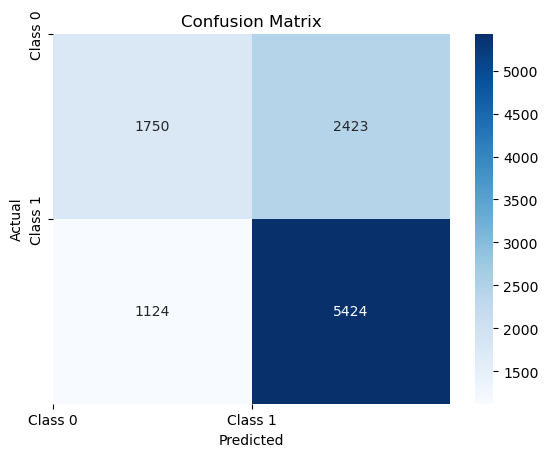

In [72]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a list of class labels
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)

# Show the plot
plt.show()

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

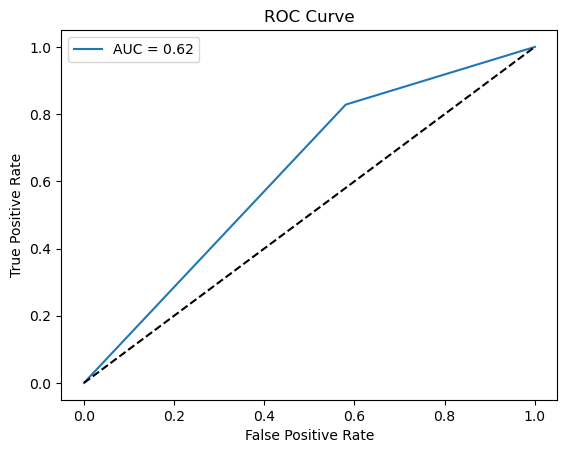

In [76]:
# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [37]:
import pandas as pd

# Load the dataset
bioactivity_data = pd.read_csv("Kinase_final_data.csv")

# Extract the relevant columns
smiles_column = bioactivity_data['canonical_smiles']
molecule_ids = bioactivity_data['molecule_chembl_id']

# Save the SMILES strings and molecule IDs to a .smi file
with open("output.smi", "w") as smi_file:
    for smiles, chembl_id in zip(smiles_column, molecule_ids):
        smi_file.write(f"{smiles} {chembl_id}\n")

print("SMILES strings and molecule IDs saved to output.smi")

SMILES strings and molecule IDs saved to output.smi


In [38]:
# Check for missing values in the relevant columns
missing_smiles = bioactivity_data['canonical_smiles'].isnull().sum()
missing_ids = bioactivity_data['molecule_chembl_id'].isnull().sum()

if missing_smiles > 0 or missing_ids > 0:
    print(f"Missing SMILES: {missing_smiles}, Missing IDs: {missing_ids}")
else:
    print("No missing data in the relevant columns.")

No missing data in the relevant columns.


In [39]:
# Count the number of rows in the DataFrame
num_rows = len(bioactivity_data)

# Count the number of lines in the .smi file
with open("output.smi", "r") as smi_file:
    num_lines = sum(1 for line in smi_file)

if num_rows == num_lines:
    print("The .smi file is complete.")
else:
    print(f"Mismatch: DataFrame rows = {num_rows}, .smi file lines = {num_lines}")

The .smi file is complete.


In [40]:
# Validate the content of the .smi file
with open("output.smi", "r") as smi_file:
    for i, line in enumerate(smi_file, start=1):
        parts = line.strip().split()
        if len(parts) != 2:
            print(f"Error on line {i}: {line.strip()}")

# ML Proyect for MoML in Montreal 
### Logistic Regression applied to a set of compound with biological activity against tyrosine kinases.

In [78]:
import numpy

In [79]:
# Loads the bioactivity data into a Pandas dataframe
bioactivity_data = pd.read_csv("ligands_descriptors_updated.csv", sep=';')
print(bioactivity_data.iloc[:,0:11])

                                                  SMILES   MolWt  LogP  HBD  \
0      CCCCc1ccc(Nc2nnc3cc(-c4cc(OC)cc(OC)c4)cc(C)c3n...  428.54  6.10    1   
1      CONC(=O)CCc1c(SSc2[nH]c3ccccc3c2CCC(=O)NOC)[nH...  498.63  4.67    4   
2                  COc1cc(O)c2c(c1)-c1cc(O)c(O)cc1COC2=O  288.26  2.15    3   
3            COc1cccc(-c2nc3c(O)nc(NC(C)=O)nc3[nH]2)c1OC  329.32  1.70    3   
4      Cc1nc2cc(-n3ncc(C(=O)c4cc5cc(C(C)(C)C)ccc5[nH]...  412.50  4.65    3   
...                                                  ...     ...   ...  ...   
21436  C#Cc1cccc(Nc2ncnc3cc(OCCCCCCn4ccnc4[N+](=O)[O-...  486.53  5.11    1   
21437                          OCCNc1ncnc2sc3c(c12)CCCC3  249.34  1.97    2   
21438        O=C1Nc2ccccc2/C1=C1/Nc2ccccc2/C1=N\OCC(O)CO  351.36  1.55    4   
21439  COc1cc2c(Oc3ccc(-c4nc5ccccc5s4)cc3F)ncnc2cc1OC...  559.67  5.86    0   
21440     COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCCC1CCN(C)CC1  444.94  5.29    1   

       HBA  RotatableBonds    TPSA  Volume  Lipinsk

In [80]:
#bioactivity_data.drop('molecule_chembl_id', axis=1, inplace=True)
#bioactivity_data.drop('canonical_smiles', axis=1, inplace=True)
#bioactivity_data.drop('standard_value', axis=1, inplace=True)
bioactivity_data.drop('SMILES', axis=1, inplace=True)

bioactivity_data.to_csv("dataset-processed.csv", index=False)
# Let's see what's in the Bank-full data - Jupyter notebooks print the result of the last thing you do
df = pd.read_csv("dataset-processed.csv")  

df.head()

,MolWt,LogP,HBD,HBA,RotatableBonds,TPSA,Volume,LipinskiViolations,NumAtoms,pIC50
0,428.54,6.10,1,6,8,69.16,257.96,1,32,4.000000
1,498.63,4.67,4,6,11,108.24,300.08,0,34,5.537602
2,288.26,2.15,3,6,1,96.22,173.53,0,21,8.000000
3,329.32,1.70,3,7,4,122.25,198.26,0,24,5.039529
4,412.50,4.65,3,5,3,105.38,248.31,0,31,6.823909


In [81]:
from sklearn import linear_model

In [82]:
# Converts the bioactivity data to binary classification labels
labels = [1 if bioactivity >= 6 else 0 for bioactivity in bioactivity_data['pIC50']]

In [83]:
# We will split the dataset into training and testing sets 
X = df.drop("pIC50", axis=1)
y = labels

df.head()

,MolWt,LogP,HBD,HBA,RotatableBonds,TPSA,Volume,LipinskiViolations,NumAtoms,pIC50
0,428.54,6.10,1,6,8,69.16,257.96,1,32,4.000000
1,498.63,4.67,4,6,11,108.24,300.08,0,34,5.537602
2,288.26,2.15,3,6,1,96.22,173.53,0,21,8.000000
3,329.32,1.70,3,7,4,122.25,198.26,0,24,5.039529
4,412.50,4.65,3,5,3,105.38,248.31,0,31,6.823909


In [103]:
# Encoding the outcome column to get numerical class
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [104]:
logr = linear_model.LogisticRegression(max_iter=5000) 
logr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [105]:
# import performance metric libraries 
from sklearn.metrics import (
accuracy_score, 
confusion_matrix, 
ConfusionMatrixDisplay, 
f1_score, 
classification_report
)

In [106]:
# Make predictions on the testing data
y_pred = logr.predict(X_test)

# measure the performance
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted") 
print("The accuracy of my Logistic Regression Model is:", accuracy) 
print("The F1 Score of my Logistic Regression Model is:", f1)

The accuracy of my Logistic Regression Model is: 0.6748437645742001
The F1 Score of my Logistic Regression Model is: 0.6907785038185864


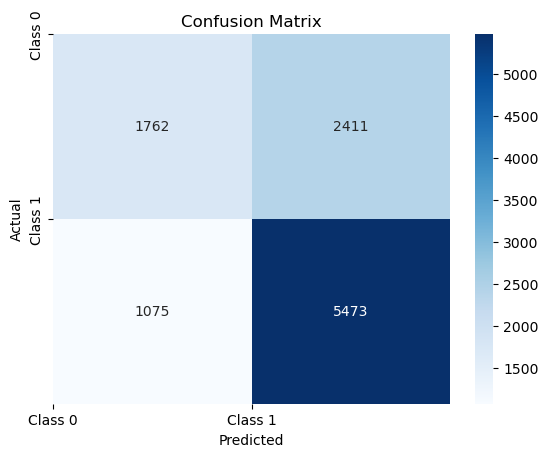

In [107]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a list of class labels
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)

# Show the plot
plt.show()

In [108]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

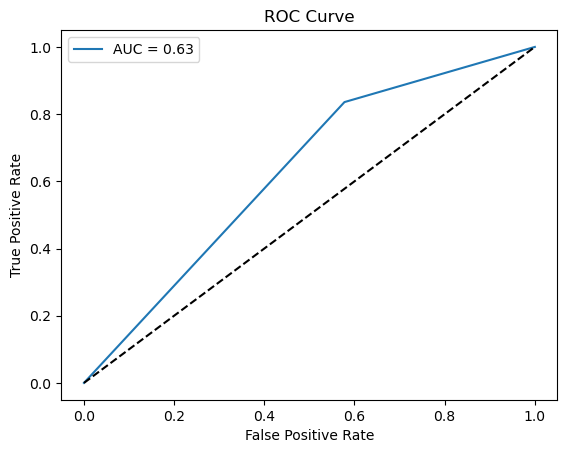

In [109]:
# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ML Proyect for MoML in Montreal 
### Decision Tree Classifier applied to a set of compound with biological activity against tyrosine kinases.

In [118]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [119]:
# Loads the bioactivity data into a Pandas dataframe
bioactivity_data = pd.read_csv("ligands_descriptors_updated.csv", sep=';')
print(bioactivity_data.iloc[:,0:11])

                                                  SMILES   MolWt  LogP  HBD  \
0      CCCCc1ccc(Nc2nnc3cc(-c4cc(OC)cc(OC)c4)cc(C)c3n...  428.54  6.10    1   
1      CONC(=O)CCc1c(SSc2[nH]c3ccccc3c2CCC(=O)NOC)[nH...  498.63  4.67    4   
2                  COc1cc(O)c2c(c1)-c1cc(O)c(O)cc1COC2=O  288.26  2.15    3   
3            COc1cccc(-c2nc3c(O)nc(NC(C)=O)nc3[nH]2)c1OC  329.32  1.70    3   
4      Cc1nc2cc(-n3ncc(C(=O)c4cc5cc(C(C)(C)C)ccc5[nH]...  412.50  4.65    3   
...                                                  ...     ...   ...  ...   
21436  C#Cc1cccc(Nc2ncnc3cc(OCCCCCCn4ccnc4[N+](=O)[O-...  486.53  5.11    1   
21437                          OCCNc1ncnc2sc3c(c12)CCCC3  249.34  1.97    2   
21438        O=C1Nc2ccccc2/C1=C1/Nc2ccccc2/C1=N\OCC(O)CO  351.36  1.55    4   
21439  COc1cc2c(Oc3ccc(-c4nc5ccccc5s4)cc3F)ncnc2cc1OC...  559.67  5.86    0   
21440     COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCCC1CCN(C)CC1  444.94  5.29    1   

       HBA  RotatableBonds    TPSA  Volume  Lipinsk

In [120]:
# view dimensions of dataset

bioactivity_data.shape

(21441, 11)

In [122]:
#bioactivity_data.drop('molecule_chembl_id', axis=1, inplace=True)
#bioactivity_data.drop('canonical_smiles', axis=1, inplace=True)
#bioactivity_data.drop('standard_value', axis=1, inplace=True)
bioactivity_data.drop('SMILES', axis=1, inplace=True)

bioactivity_data.to_csv("dataset-processed.csv", index=False)
# Let's see what's in the Bank-full data - Jupyter notebooks print the result of the last thing you do
df = pd.read_csv("dataset-processed.csv")  

df.head()

,MolWt,LogP,HBD,HBA,RotatableBonds,TPSA,Volume,LipinskiViolations,NumAtoms,pIC50
0,428.54,6.10,1,6,8,69.16,257.96,1,32,4.000000
1,498.63,4.67,4,6,11,108.24,300.08,0,34,5.537602
2,288.26,2.15,3,6,1,96.22,173.53,0,21,8.000000
3,329.32,1.70,3,7,4,122.25,198.26,0,24,5.039529
4,412.50,4.65,3,5,3,105.38,248.31,0,31,6.823909


In [123]:
bioactivity_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21441 entries, 0 to 21440
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolWt               21441 non-null  float64
 1   LogP                21441 non-null  float64
 2   HBD                 21441 non-null  int64  
 3   HBA                 21441 non-null  int64  
 4   RotatableBonds      21441 non-null  int64  
 5   TPSA                21441 non-null  float64
 6   Volume              21441 non-null  float64
 7   LipinskiViolations  21441 non-null  int64  
 8   NumAtoms            21441 non-null  int64  
 9   pIC50               21441 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.6 MB


In [124]:
# check missing values in variables

bioactivity_data.isnull().sum()

MolWt                 0
LogP                  0
HBD                   0
HBA                   0
RotatableBonds        0
TPSA                  0
Volume                0
LipinskiViolations    0
NumAtoms              0
pIC50                 0
dtype: int64

In [125]:
# Converts the bioactivity data to binary classification labels
labels = [1 if bioactivity >= 6 else 0 for bioactivity in bioactivity_data['pIC50']]

In [126]:
# We will split the dataset into training and testing sets 
X = df.drop("pIC50", axis=1)
y = labels

df.head()

,MolWt,LogP,HBD,HBA,RotatableBonds,TPSA,Volume,LipinskiViolations,NumAtoms,pIC50
0,428.54,6.10,1,6,8,69.16,257.96,1,32,4.000000
1,498.63,4.67,4,6,11,108.24,300.08,0,34,5.537602
2,288.26,2.15,3,6,1,96.22,173.53,0,21,8.000000
3,329.32,1.70,3,7,4,122.25,198.26,0,24,5.039529
4,412.50,4.65,3,5,3,105.38,248.31,0,31,6.823909


In [143]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [144]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((10720, 9), (10721, 9))

In [145]:
# check data types in X_train

X_train.dtypes

MolWt                 float64
LogP                  float64
HBD                     int64
HBA                     int64
RotatableBonds          int64
TPSA                  float64
Volume                float64
LipinskiViolations      int64
NumAtoms                int64
dtype: object

In [146]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [147]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [148]:
y_pred_gini = clf_gini.predict(X_test)


In [149]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.6814


In [150]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 1, 1, ..., 1, 1, 1])

In [151]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.6757


[Text(0.5, 0.875, 'x[8] <= 30.5\ngini = 0.477\nsamples = 10720\nvalue = [4206, 6514]'),
 Text(0.25, 0.625, 'x[3] <= 4.5\ngini = 0.497\nsamples = 4533\nvalue = [2439, 2094]'),
 Text(0.125, 0.375, 'x[0] <= 274.505\ngini = 0.445\nsamples = 1574\nvalue = [1047, 527]'),
 Text(0.0625, 0.125, 'gini = 0.218\nsamples = 345\nvalue = [302, 43]'),
 Text(0.1875, 0.125, 'gini = 0.477\nsamples = 1229\nvalue = [745, 484]'),
 Text(0.375, 0.375, 'x[0] <= 373.45\ngini = 0.498\nsamples = 2959\nvalue = [1392, 1567]'),
 Text(0.3125, 0.125, 'gini = 0.499\nsamples = 1451\nvalue = [763, 688]'),
 Text(0.4375, 0.125, 'gini = 0.486\nsamples = 1508\nvalue = [629, 879]'),
 Text(0.75, 0.625, 'x[5] <= 163.875\ngini = 0.408\nsamples = 6187\nvalue = [1767, 4420]'),
 Text(0.625, 0.375, 'x[3] <= 6.5\ngini = 0.389\nsamples = 5909\nvalue = [1563.0, 4346.0]'),
 Text(0.5625, 0.125, 'gini = 0.46\nsamples = 1769\nvalue = [634, 1135]'),
 Text(0.6875, 0.125, 'gini = 0.348\nsamples = 4140\nvalue = [929, 3211]'),
 Text(0.875, 0.37

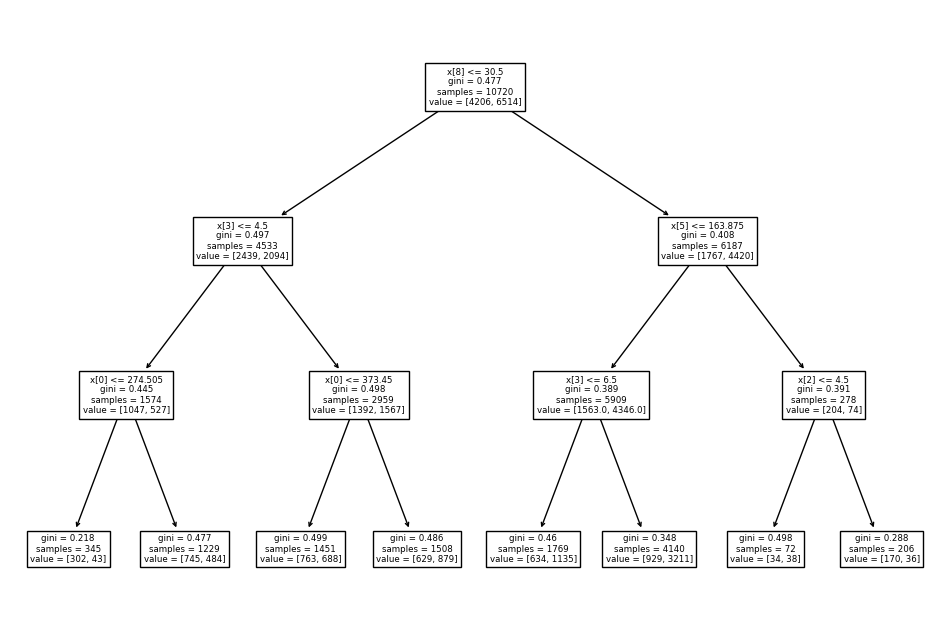

In [152]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [153]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[2002 2171]
 [1245 5303]]


In [154]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54      4173
           1       0.71      0.81      0.76      6548

    accuracy                           0.68     10721
   macro avg       0.66      0.64      0.65     10721
weighted avg       0.67      0.68      0.67     10721

